In [683]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step-1 Reading And UnderStanding The Data

In [684]:
lead_data=pd.read_csv(r"C:\Users\ashutosh.c.nayak.DIR\Documents\Course\Case_Study\Lead Scoring Assignment\Leads.csv")

In [685]:
lead_data.shape

(9240, 37)

In [686]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                  0.00  ...   
1                          674                  2.50  ...   
2                         1532                  2.00  ...   
3                          305                  1.00  ...   
4                         1428                  1.00  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                       15.00                      15.00   
1                       15.00                      15.00   
2                       14.00                      20.00   
3                       13.00                      17.00   
4                       15.00                      18.00   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [687]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

No Datatype change of the columns are required

In [688]:
lead_data.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [689]:
lead_data.loc[lead_data.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

No duplicate record found in the dataset.

In [690]:
#check for duplicates
sum(lead_data.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number

## EXPLORATORY DATA ANALYSIS

### Step-2 Data Cleaning & Treatment:

In [691]:
lead_data.describe(include='object').head(10)

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     f0d6b8f3-d1bf-4ea4-a712-2249fc46b3a1  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Country  \
count         9204         9240        9240          9137    6779   
unique          21            2           2            17      38   
top         Google           No          No  Email Opened   India   
freq          2868         8506        9238          3437    6492   

       Specialization How did you hear about X Education  \
count            7802                               7033   
unique             19                                 10   
top            Select                             Select   
freq             1942                               5043   

       What is your current occupation  ... Lead Quality  \
count                             6550  ...         4473   
unique                               6  ...            5   
top                         Unemployed  ...     Might be   
freq                              5600  ...         1560   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       Lead Profile    City Asymmetrique Activity Index  \
count          6531    7820                        5022   
unique            6       7                           3   
top          Select  Mumbai                   02.Medium   
freq           4146    3222                        3839   

       Asymmetrique Profile Index I agree to pay the amount through cheque  \
count                        5022                                     9240   
unique                          3                                        1   
top                     02.Medium                                       No   
freq                         2788                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 30 columns]

We see for some categorical variable the value is select. So we will be replacing the select values with Nan

In [692]:
lead_data = lead_data.replace('Select', np.nan)

In [693]:
#checking null values in each rows

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [694]:
#checking percentage of null values in each column

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Dropping columns which has null values percentage greater than 45% And Replacing the median values for continuous variable.

In [695]:

def nullvalue_function(base_dataset,percentage):

    # Printing the shape of the data 
    
    print(base_dataset.shape)
    
    # Converting  into percentage table
    
    null_value_table=pd.DataFrame((base_dataset.isna().sum()/base_dataset.shape[0])*100).sort_values(0,ascending=False )
    
    null_value_table.columns=['null percentage']
    
    # Defining the threashold values 
    
    print(null_value_table[null_value_table['null percentage']>percentage].index)
    
    # Drop the columns that has null values more than threashold 
    base_dataset.drop(null_value_table[null_value_table['null percentage']>percentage].index,axis=1,inplace=True)
    
    # Replace the null values with median() # continous variables 
    for i in base_dataset.describe().columns:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
  
    print(base_dataset.shape)
    
    return base_dataset

In [696]:
lead_data=nullvalue_function(lead_data,45)

(9240, 37)
Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index'],
      dtype='object')
(9240, 30)


In [697]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

### Null Value Treatment Of Categorical Variable

Fetching all the categorical columns which have only one unique value

In [698]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [699]:
lead_data.loc[:,lead_data.nunique()==1].columns

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [700]:
#dropping the columns which has only one unique content
col=list(lead_data.loc[:,lead_data.nunique()==1].columns)
lead_data.drop(col,axis=1,inplace=True)

In [701]:
lead_data.shape

(9240, 25)

In [702]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
lead_data = lead_data.drop('Prospect ID', axis=1)

Finding all the categorical columns with unique values having null values.

In [703]:
##checking unique values in columns having NAN values
for i in lead_data.describe(include='object').columns:
    if(lead_data[i].isna().sum()):
        print(i,lead_data[i].unique(),"\n")

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Country [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Ke

In [704]:
#checking value counts of Country column

lead_data['Country'].value_counts(dropna=False).head(10)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Name: Country, dtype: int64

In [705]:
#Since for the country column the mode vallue is India. Replacing all the null values in county column with mode values.
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')

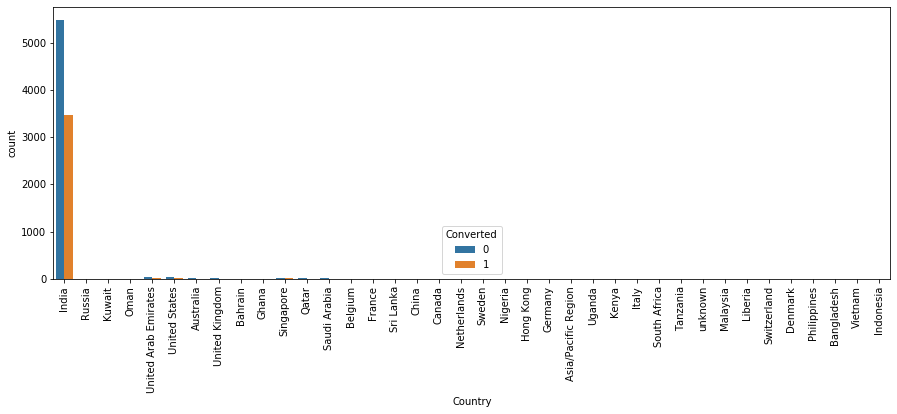

In [706]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Country, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [707]:
lead_data['Country'].value_counts(normalize=True) * 100

India                  96.89
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Hong Kong               0.08
Bahrain                 0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Germany                 0.04
Nigeria                 0.04
Canada                  0.04
Kuwait                  0.04
South Africa            0.04
Sweden                  0.03
China                   0.02
Bangladesh              0.02
Italy                   0.02
Asia/Pacific Region     0.02
Philippines             0.02
Netherlands             0.02
Belgium                 0.02
Uganda                  0.02
Ghana                   0.02
Russia                  0.01
Switzerland             0.01
Tanzania                0.01
Sri Lanka               0.01
Denmark                 0.01
Kenya                   0.01
Malaysia      

As we can see the Number of Values for India are quite high (nearly 97% of the Data), let's combine the other datas

In [708]:
lead_data['Country'] = lead_data['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
lead_data['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

In [709]:
#checking value counts of Lead Source column

lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [710]:
#replacing Nan Values 
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Others')

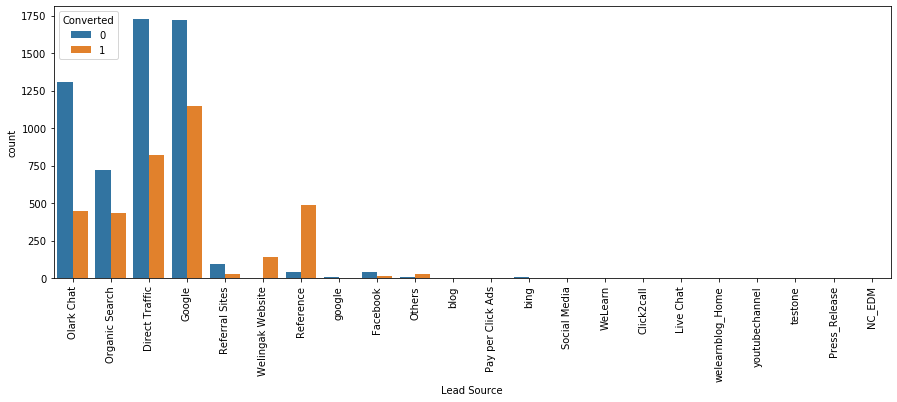

In [711]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
ax=sns.countplot(lead_data['Lead Source'], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [712]:
#checking value counts of Last Activity column

lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [713]:
lead_data['Last Activity'].fillna("Unknown", inplace = True)
lead_data['Last Activity'].value_counts(normalize=True) * 100

Email Opened                   37.20
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
Unknown                         1.11
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Received                  0.02
Email Marked Spam               0.02
Resubscribed to emails          0.01
Visited Booth in Tradeshow      0.01
Name: Last Activity, dtype: float64

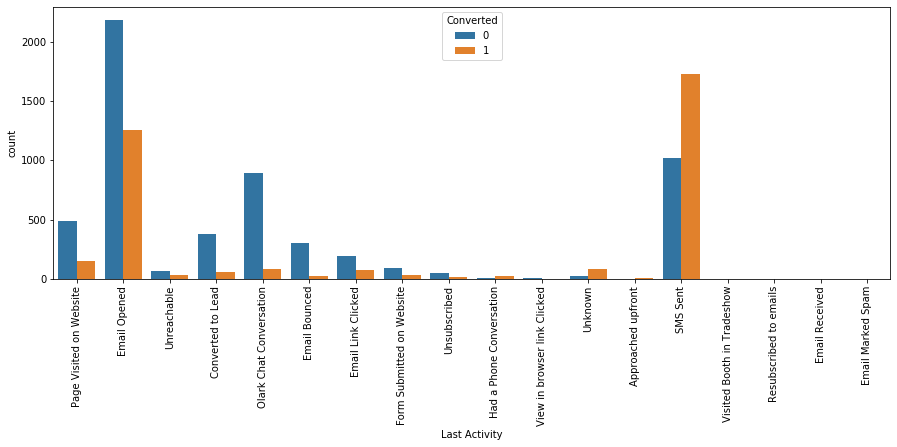

In [714]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
ax=sns.countplot(lead_data['Last Activity'], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [715]:
#checking value counts of Specialization column

lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [716]:
lead_data['Specialization'].fillna("Unknown", inplace = True)

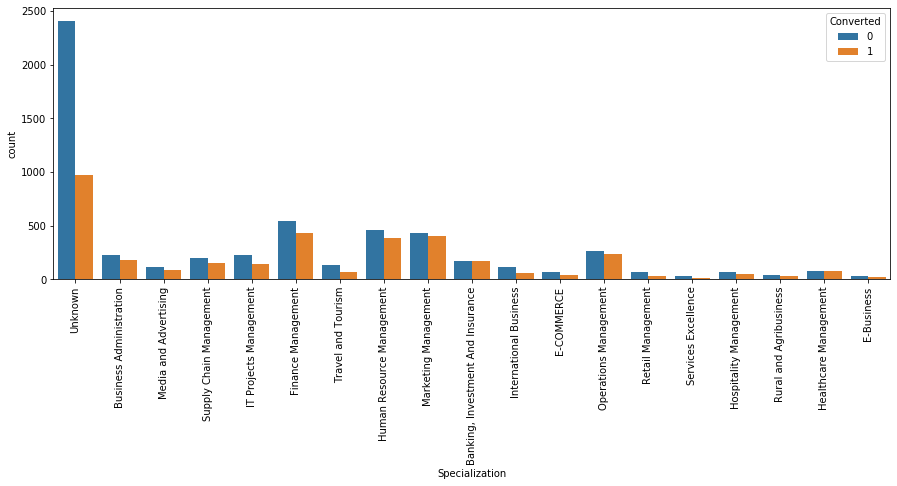

In [717]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
ax=sns.countplot(lead_data['Specialization'], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [718]:
#checking value counts of What is your current occupation column

lead_data['What is your current occupation'].value_counts(dropna=False).head(10)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [719]:
lead_data['What is your current occupation'].value_counts(normalize=True) * 100

Unemployed             85.50
Working Professional   10.78
Student                 3.21
Other                   0.24
Housewife               0.15
Businessman             0.12
Name: What is your current occupation, dtype: float64

In [720]:
lead_data['What is your current occupation'].fillna("Unknown", inplace = True)

In [721]:
#checking value counts of What matters most to you in choosing a course column

lead_data['What matters most to you in choosing a course'].value_counts(dropna=False).head(10)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [722]:
lead_data['What matters most to you in choosing a course'].fillna("Unknown", inplace = True)

In [723]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects     70.65
Unknown                     29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: What matters most to you in choosing a course, dtype: float64

In [724]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].apply(lambda x: 'Better Career Prospects' if x=='Better Career Prospects' else 'Other')

In [725]:
#checking value counts of Country column

lead_data['Tags'].value_counts(dropna=False).head(10)

NaN                                    3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Name: Tags, dtype: int64

In [726]:
##Dropping the Tags columns as it has high number of null values and also it does not contribute more into our lead prediction.
#lead_data.drop('Tags',axis=1,inplace=True)

In [727]:
#replacing Nan values with "Not Specified"
lead_data['Tags'] = lead_data['Tags'].replace(np.nan,'Not Specified')

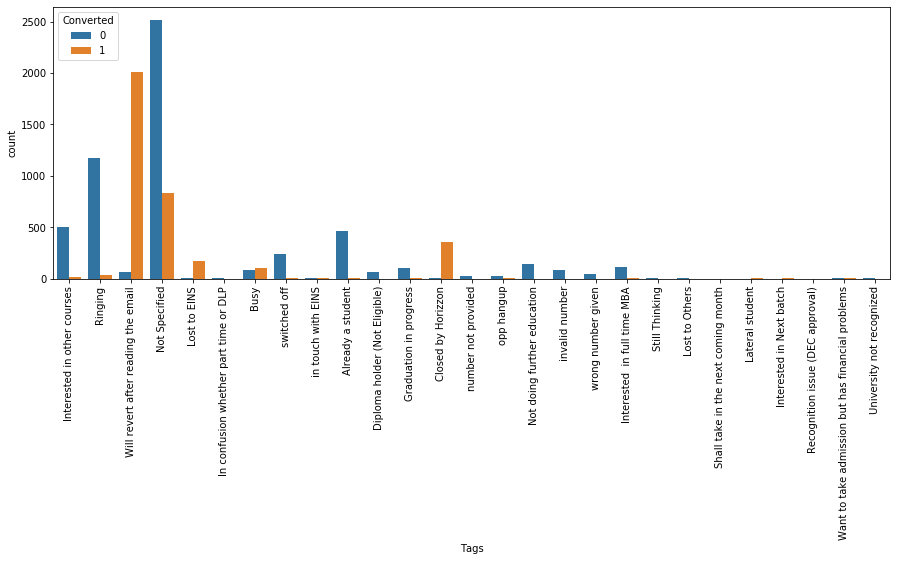

In [728]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
ax=sns.countplot(lead_data['Tags'], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [729]:
#checking value counts of City column

lead_data['City'].value_counts(dropna=False).head(10)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [730]:
lead_data['City'].fillna("Unknown", inplace = True)

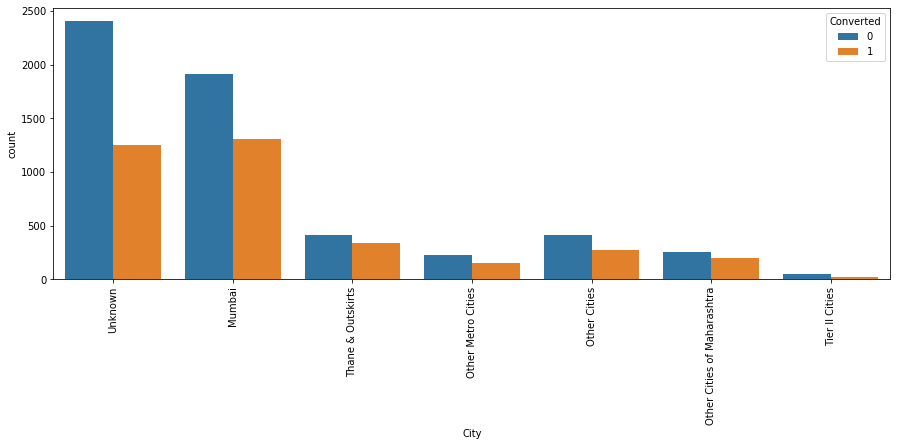

In [731]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
ax=sns.countplot(lead_data['City'], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [732]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

All null values are treated in all the categorical and numerical variables.

Finding all the columns that has only one value for 99% rows.

In [733]:
##Finding all the columns that has only one value for 99% rows.
columns=[]
for i in lead_data.describe(include='object').columns:
    if((lead_data[i].value_counts(normalize=True)[0]*100)>99):
        columns.append(i)

In [734]:
columns

['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [735]:
##Dropping all the variables that has high skewness
lead_data.drop(columns,axis=1,inplace=True)

In [736]:
lead_data.shape

(9240, 17)

### Outlier Treatment

In [737]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
lead_data.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9240.00                      9240.00   
mean     617188.44       0.39         3.44                       487.70   
std       23406.00       0.49         4.82                       548.02   
min      579533.00       0.00         0.00                         0.00   
1%       580317.12       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
90%      650506.10       1.00         7.00                      1380.00   
95%      655404.05       1.00        10.00                      1562.00   
99%      659592.98       1.00        17.00                      1840.61   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  
count               9240.00  
mean                   2.36  
std                    2.15  
min                    0.00  
1%                     0.00  
25%                    1.00  
50%                    2.00  
75%                    3.00  
90%                    5.00  
95%                    6.00  
99%                    9.00  
max                   55.00

In [738]:
def plot_Outlier(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        ax=sns.boxplot(x = lead_data[var])   
    plt.show()

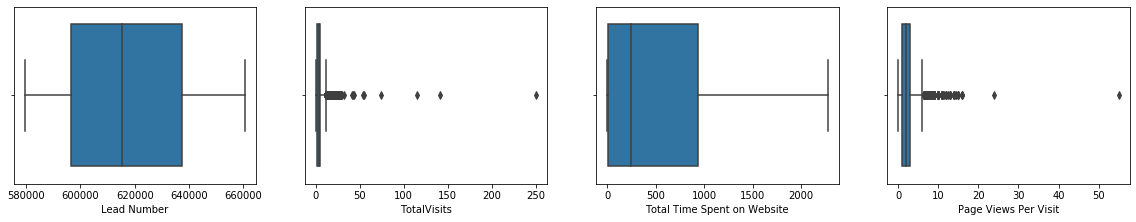

In [739]:
plot_Outlier(['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])

In [740]:
print("Before Removing outliers",lead_data.shape)
Q1 = lead_data['TotalVisits'].quantile(0.25)
Q3 = lead_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lead_data=lead_data.loc[(lead_data['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_data['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = lead_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead_data=lead_data.loc[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

lead_data.shape

Before Removing outliers (9240, 17)


(8679, 17)

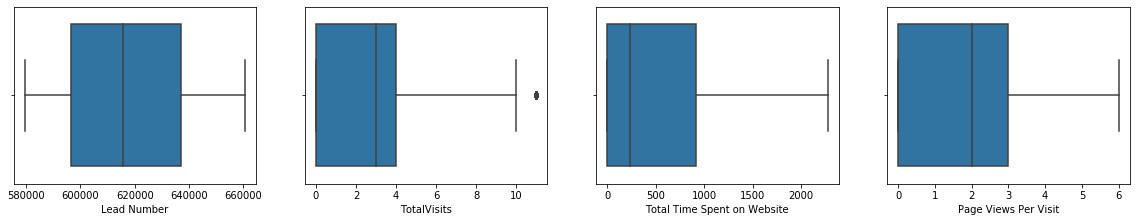

In [741]:
plot_Outlier(['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])

In [742]:
# Converting Yes to 1 and No to 0
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

#### Creation of Dummy variables for categorical variables

In [743]:
colmn=[]
for i in lead_data.describe(include='object').columns:
    # Creating a dummy variable 
    colmn.append(i)
    cont = pd.get_dummies(lead_data[i],prefix=i,drop_first=True)
    #Adding the results to the master dataframe
    lead_data = pd.concat([lead_data,cont],axis=1) 

In [744]:
colmn

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [745]:
#created dummies for the below variables, so drop the same
lead_data = lead_data.drop(columns = colmn,axis=1)

In [746]:
lead_data.shape

(8679, 122)

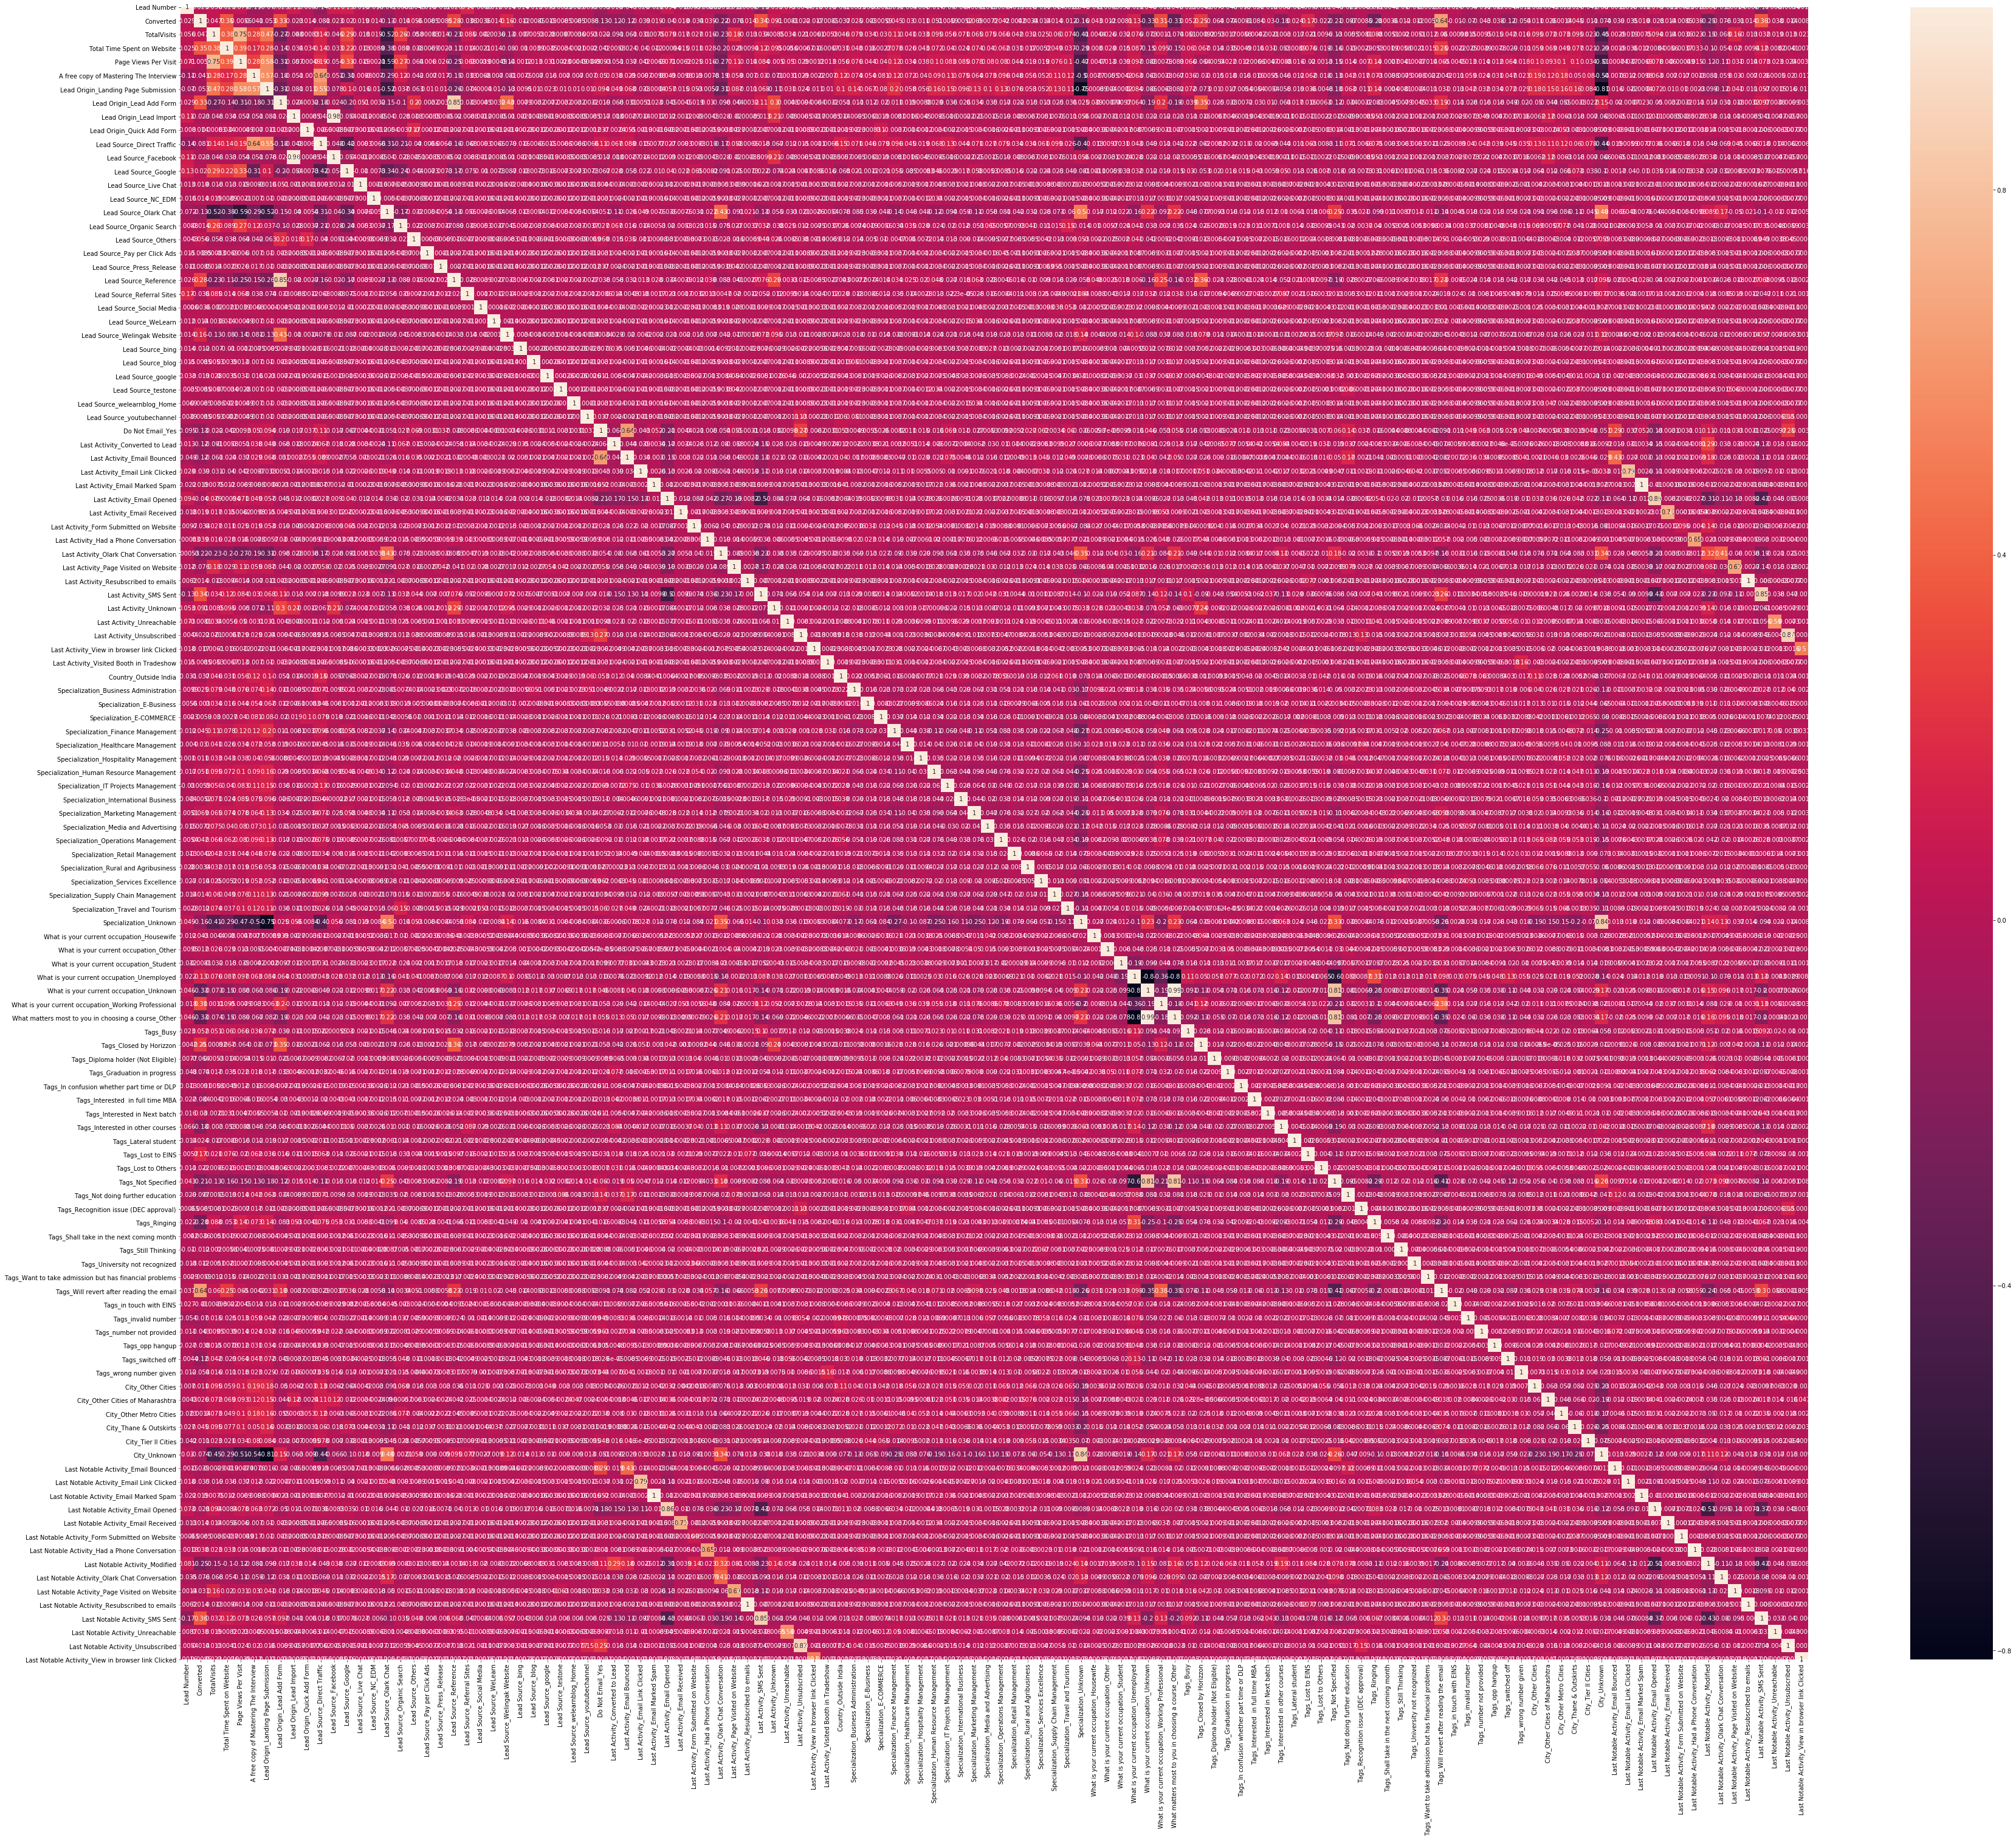

In [747]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

### Step-3 rain-Test Split & Logistic Regression Model Building:

In [748]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Lead Number'], axis=1)
# Putting response variable to y
y = lead_data['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4: Feature Scaling

In [749]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5182        -0.74                        -0.77                 -0.65   
8469        -0.33                        -0.53                 -0.05   
8382         0.08                         1.69                 -0.35   
8031         0.08                        -0.08                  0.56   
6712         0.08                         2.94                 -0.05   

      A free copy of Mastering The Interview  \
5182                                       0   
8469                                       1   
8382                                       0   
8031                                       0   
6712                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5182                                    0                          0   
8469                                    1                          0   
8382                                    0                          0   
8031                                    1                          0   
6712                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5182                        0                           0   
8469                        0                           0   
8382                        0                           0   
8031                        0                           0   
6712                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
5182                           0                     0  ...   
8469                           1                     0  ...   
8382                           0                     0  ...   
8031                           1                     0  ...   
6712                           0                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
5182                                                0   
8469                                                0   
8382                                                0   
8031                                                0   
6712                                                0   

      Last Notable Activity_Had a Phone Conversation  \
5182                                               0   
8469                                               0   
8382                                               0   
8031                                               0   
6712                                               0   

      Last Notable Activity_Modified  \
5182                               1   
8469                               1   
8382                               0   
8031                               0   
6712                               1   

      Last Notable Activity_Olark Chat Conversation  \
5182                                              0   
8469                                              0   
8382                                              0   
8031                                              0   
6712                                              0   

      Last Notable Activity_Page Visited on Website  \
5182                                              0   
8469                                              0   
8382                                              0   
8031                                              0   
6712                                              0   

      Last Notable Activity_Resubscribed to emails  \
5182                                             0   
8469                                             0   
8382                                             0   
8031                                             0   
6712                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
5182                               0                                  0   
8469                               0           

In [750]:
X_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count      6075.00                      6075.00               6075.00   
mean         -0.00                         0.00                 -0.00   
std           1.00                         1.00                  1.00   
min          -1.16                        -0.87                 -1.25   
25%          -1.16                        -0.87                 -1.25   
50%           0.08                        -0.44                 -0.05   
75%           0.49                         0.80                  0.56   
max           3.38                         3.26                  2.37   

       A free copy of Mastering The Interview  \
count                                 6075.00   
mean                                     0.29   
std                                      0.45   
min                                      0.00   
25%                                      0.00   
50%                                      0.00   
75%                                      1.00   
max                                      1.00   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                              6075.00                    6075.00   
mean                                  0.51                       0.08   
std                                   0.50                       0.28   
min                                   0.00                       0.00   
25%                                   0.00                       0.00   
50%                                   1.00                       0.00   
75%                                   1.00                       0.00   
max                                   1.00                       1.00   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count                  6075.00                     6075.00   
mean                      0.01                        0.00   
std                       0.08                        0.01   
min                       0.00                        0.00   
25%                       0.00                        0.00   
50%                       0.00                        0.00   
75%                       0.00                        0.00   
max                       1.00                        1.00   

       Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
count                     6075.00               6075.00  ...   
mean                         0.27                  0.01  ...   
std                          0.45                  0.08  ...   
min                          0.00                  0.00  ...   
25%                          0.00                  0.00  ...   
50%                          0.00                  0.00  ...   
75%                          1.00                  0.00  ...   
max                          1.00                  1.00  ...   

       Last Notable Activity_Form Submitted on Website  \
count                                          6075.00   
mean                                              0.00   
std                                               0.01   
min                                               0.00   
25%                                               0.00   
50%                                               0.00   
75%                                               0.00   
max                                               1.00   

       Last Notable Activity_Had a Phone Conversation  \
count                                         6075.00   
mean                                             0.00   
std                                              0.04   
min                                              0.00   
25%                                              0.00   
50%                                              0.00   
75%                                              0.00   
max                                              1.00   

       Last Notable Activity_Modified  \
count                         6075.

#### Checking the Lead Conversion Rate

In [751]:
### Checking the Lead Conversion Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.391519760341055

In [752]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     5960
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -932.76
Date:                Mon, 20 Apr 2020   Deviance:                       1865.5
Time:                        09:23:29   Pearson chi2:                 1.19e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     38.2336   4.36e+05   8.78e-05      1.000   -8.54e+05    8.54e+05
TotalVisits                                                0.2551      0.097      2.622      0.009       0.064       0.446
Total Time Spent on Website                                1.0103      0.073     13.841      0.000       0.867       1.153
Page Views Per Visit                                      -0.3218      0.114     -2.822      0.005      -0.545      -0.098
A free copy of Mastering The Interview                    -0.2456      0.218     -1.127      0.260      -0.673       0.182
Lead Origin_Landing Page Submission                       -0.2519      0.293     -0.860      0.390      -0.826       0.322
Lead Origin_Lead Add Form                                 -0.3580     14.111     -0.025      0.980     -28.015      27.299
Lead Origin_Lead Import                                   23.8322   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
Lead Origin_Quick Add Form                                23.8260   3.52e+05   6.76e-05      1.000    -6.9e+05     6.9e+05
Lead Source_Direct Traffic                               -23.9612   2.39e+05     -0.000      1.000   -4.68e+05    4.68e+05
Lead Source_Facebook                                     -48.5814   2.45e+05     -0.000      1.000   -4.81e+05    4.81e+05
Lead Source_Google                                       -23.9845   2.39e+05     -0.000      1.000   -4.68e+05    4.68e+05
Lead Source_Live Chat                                     -1.7942   4.27e+05   -4.2e-06      1.000   -8.37e+05    8.37e+05
Lead Source_NC_EDM                                         3.5501   4.23e+05   8.39e-06      1.000   -8.29e+05    8.29e+05
Lead Source_Olark Chat                                   -23.2332   2.39e+05  -9.72e-05      1.000   -4.68e+05    4.68e+05
Lead Source_Organic Search                               -23.9346   2.39e+05     -0.000      1.000   -4.68e+05    4.68e+05
Lead Source_Others                                       -22.2657   2.39e+05  -9.32e-05      1.000   -4.68e+05    4.68e+05
Lead Source_Pay per Click Ads                            -44.8971   4.31e+05     -0.000      1.000   -8.46e+05    8.46e+05
Lead Source_Press_Release                              -3.439e-09      0.000   -8.3e-06      1.000      -0.001       0.001
Lead Source_Reference                                    -23.2003   2.39e+05  -9.71e-05      1.000   -4.68e+05    4.68e+05
Lead Source_Referral Sites                               -23.9505   2.39e+05     -0.000      1.000   -4.68e+05    4.68e+05
Lead Source_Social Media                                   0.9185   4.18e+05    2.2e-06      1.000    -8.2e+05     8.2e+05
Lead Sou

### Step 5: Feature Selection Using RFE

In [753]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [754]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [755]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [756]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 50),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 48),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', False, 25),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 74),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 100),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', False, 49),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', False, 85),
 ('Lead Source_Pay per Click Ads', False, 99),
 ('Lead Source_Press_Release', False, 104),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 79),
 ('Lead Source_WeLearn', False, 105),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lea

In [757]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=105)

In [758]:
col = X_train.columns[rfe.support_]

In [759]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
5182                             0                       0   
8469                             0                       0   
8382                             0                       0   
8031                             0                       0   
6712                             0                       0   

      What matters most to you in choosing a course_Other  Tags_Busy  \
5182                                                  0            0   
8469                                                  0            0   
8382                                                  0            0   
8031                                                  0            0   
6712                                                  0            0   

      Tags_Closed by Horizzon  Tags_Interested in Next batch  \
5182                        0                              0   
8469                        0                              0   
8382                        0                              0   
8031                        0                              0   
6712                        1                              0   

      Tags_Lateral student  Tags_Lost to EINS  Tags_Not Specified  \
5182                     0                  0                   0   
8469                     0                  0                   0   
8382                     0                  0                   0   
8031                     0                  0                   0   
6712                     0                  0                   0   

      Tags_Ringing  Tags_Will revert after reading the email  \
5182             0                                         0   
8469             0                                         0   
8382             1                                         0   
8031             0                                         0   
6712             0                                         0   

      Tags_invalid number  Tags_switched off  Last Notable Activity_Modified  \
5182                    0                  0                               1   
8469                    0                  0                               1   
8382                    0                  0                               0   
8031                    0                  0                               0   
6712                    0                  0                               1   

      Last Notable Activity_Olark Chat Conversation  
5182                                              0  
8469                                              0  
8382                                              0  
8031                                              0  
6712                                              0

### Building model using statsmodel, for the detailed statistics

In [760]:
def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [761]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1112.0
Date:                Mon, 20 Apr 2020   Deviance:                       2223.9
Time:                        09:23:39   Pearson chi2:                 1.29e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.5677      0.239    -14.903      0.000      -4.037      -3.099
Lead Source_Welingak Website                            3.9325      1.034      3.804      0.000       1.906       5.959
Last Activity_SMS Sent                                  2.1917      0.130     16.890      0.000       1.937       2.446
What matters most to you in choosing a course_Other    -2.5399      0.155    -16.390      0.000      -2.844      -2.236
Tags_Busy                                               2.7988      0.325      8.605      0.000       2.161       3.436
Tags_Closed by Horizzon                                 9.6101      0.756     12.712      0.000       8.128      11.092
Tags_Interested in Next batch                          25.9421   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                                   27.7344   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                       9.8352      0.671     14.647      0.000       8.519      11.151
Tags_Not Specified                                      4.0218      0.266     15.120      0.000       3.500       4.543
Tags_Ringing                                           -1.0952      0.325     -3.370      0.001      -1.732      -0.458
Tags_Will revert after reading the email                7.0899      0.290     24.420      0.000       6.521       7.659
Tags_invalid number                                   -21.9694   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Tags_switched off                                      -1.6143      0.639     -2.527      0.012      -2.867      -0.362
Last Notable Activity_Modified                         -1.7923      0.137    -13.063      0.000      -2.061      -1.523
Last Notable Activity_Olark Chat Conversation          -1.8498      0.518     -3.574      0.000      -2.864      -0.835
=======================================================================================================================
"""

In [762]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5182   0.00
8469   0.00
8382   0.01
8031   0.03
6712   0.99
6332   1.00
458    0.02
1628   0.61
5935   0.03
4201   0.01
dtype: float64

In [763]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([ 0.46788324,  0.46788324,  0.93510324,  2.7446184 , 98.59372446,
       99.67109042,  2.02714847, 61.16166921,  2.7446184 ,  0.93510324])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [764]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID
0           0             0.47    5182
1           0             0.47    8469
2           0             0.94    8382
3           0             2.74    8031
4           1            98.59    6712

Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [765]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           0             0.47    5182          0
1           0             0.47    8469          0
2           0             0.94    8382          1
3           0             2.74    8031          1
4           1            98.59    6712          1

In [766]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[ 843 2913]
 [   3 2316]]


In [767]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.52


### Checking VIFs

In [768]:
calculateVIF(X_train[col])

Features  VIF
0                        Lead Source_Welingak Website 1.15
4                             Tags_Closed by Horizzon 1.08
7                                   Tags_Lost to EINS 1.06
3                                           Tags_Busy 1.05
14      Last Notable Activity_Olark Chat Conversation 1.04
12                                  Tags_switched off 1.03
11                                Tags_invalid number 1.01
5                       Tags_Interested in Next batch 1.00
6                                Tags_Lateral student 1.00
8                                  Tags_Not Specified 0.43
1                              Last Activity_SMS Sent 0.24
13                     Last Notable Activity_Modified 0.16
10           Tags_Will revert after reading the email 0.09
2   What matters most to you in choosing a course_... 0.08
9                                        Tags_Ringing 0.03

### Model 1

In [769]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1112.0
Date:                Mon, 20 Apr 2020   Deviance:                       2223.9
Time:                        09:23:40   Pearson chi2:                 1.29e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.5677      0.239    -14.903      0.000      -4.037      -3.099
Lead Source_Welingak Website                            3.9325      1.034      3.804      0.000       1.906       5.959
Last Activity_SMS Sent                                  2.1917      0.130     16.890      0.000       1.937       2.446
What matters most to you in choosing a course_Other    -2.5399      0.155    -16.390      0.000      -2.844      -2.236
Tags_Busy                                               2.7988      0.325      8.605      0.000       2.161       3.436
Tags_Closed by Horizzon                                 9.6101      0.756     12.712      0.000       8.128      11.092
Tags_Interested in Next batch                          25.9421   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                                   27.7344   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                       9.8352      0.671     14.647      0.000       8.519      11.151
Tags_Not Specified                                      4.0218      0.266     15.120      0.000       3.500       4.543
Tags_Ringing                                           -1.0952      0.325     -3.370      0.001      -1.732      -0.458
Tags_Will revert after reading the email                7.0899      0.290     24.420      0.000       6.521       7.659
Tags_invalid number                                   -21.9694   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Tags_switched off                                      -1.6143      0.639     -2.527      0.012      -2.867      -0.362
Last Notable Activity_Modified                         -1.7923      0.137    -13.063      0.000      -2.061      -1.523
Last Notable Activity_Olark Chat Conversation          -1.8498      0.518     -3.574      0.000      -2.864      -0.835
=======================================================================================================================
"""

In [770]:
#drop column having high p value 'Tags_Lateral student'
col = col.drop('Tags_Lateral student', 1)

In [771]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1118.2
Date:                Mon, 20 Apr 2020   Deviance:                       2236.5
Time:                        09:23:40   Pearson chi2:                 1.29e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.4814      0.230    -15.154      0.000      -3.932      -3.031
Lead Source_Welingak Website                            3.9230      1.033      3.796      0.000       1.898       5.948
Last Activity_SMS Sent                                  2.2106      0.130     17.069      0.000       1.957       2.464
What matters most to you in choosing a course_Other    -2.5456      0.155    -16.418      0.000      -2.849      -2.242
Tags_Busy                                               2.6959      0.318      8.470      0.000       2.072       3.320
Tags_Closed by Horizzon                                 9.5005      0.753     12.623      0.000       8.025      10.976
Tags_Interested in Next batch                          25.8369   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lost to EINS                                       9.7302      0.668     14.572      0.000       8.421      11.039
Tags_Not Specified                                      3.9266      0.257     15.267      0.000       3.422       4.431
Tags_Ringing                                           -1.1981      0.318     -3.767      0.000      -1.821      -0.575
Tags_Will revert after reading the email                6.9871      0.282     24.789      0.000       6.435       7.540
Tags_invalid number                                   -22.0720   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Tags_switched off                                      -1.7182      0.635     -2.704      0.007      -2.964      -0.473
Last Notable Activity_Modified                         -1.7666      0.136    -12.974      0.000      -2.033      -1.500
Last Notable Activity_Olark Chat Conversation          -1.8405      0.517     -3.560      0.000      -2.854      -0.827
=======================================================================================================================
"""

In [772]:
calculateVIF(X_train[col])

Features  VIF
0                        Lead Source_Welingak Website 1.15
4                             Tags_Closed by Horizzon 1.08
6                                   Tags_Lost to EINS 1.06
3                                           Tags_Busy 1.05
13      Last Notable Activity_Olark Chat Conversation 1.04
11                                  Tags_switched off 1.03
10                                Tags_invalid number 1.01
5                       Tags_Interested in Next batch 1.00
7                                  Tags_Not Specified 0.43
1                              Last Activity_SMS Sent 0.24
12                     Last Notable Activity_Modified 0.16
9            Tags_Will revert after reading the email 0.09
2   What matters most to you in choosing a course_... 0.08
8                                        Tags_Ringing 0.03

In [773]:
#drop column having high p value 'Tags_Interested in Next batch'
col = col.drop('Tags_Interested in Next batch', 1)

### model 2

In [774]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1125.4
Date:                Mon, 20 Apr 2020   Deviance:                       2250.9
Time:                        09:23:41   Pearson chi2:                 1.33e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.3191      0.211    -15.696      0.000      -3.734      -2.905
Lead Source_Welingak Website                            3.9339      1.034      3.805      0.000       1.907       5.960
Last Activity_SMS Sent                                  2.2518      0.129     17.432      0.000       1.999       2.505
What matters most to you in choosing a course_Other    -2.5577      0.156    -16.418      0.000      -2.863      -2.252
Tags_Busy                                               2.5119      0.306      8.218      0.000       1.913       3.111
Tags_Closed by Horizzon                                 9.3555      0.748     12.515      0.000       7.890      10.821
Tags_Lost to EINS                                       9.5941      0.663     14.481      0.000       8.296      10.893
Tags_Not Specified                                      3.7623      0.241     15.594      0.000       3.289       4.235
Tags_Ringing                                           -1.3944      0.304     -4.580      0.000      -1.991      -0.798
Tags_Will revert after reading the email                6.8327      0.268     25.523      0.000       6.308       7.357
Tags_invalid number                                   -22.2646   1.65e+04     -0.001      0.999   -3.23e+04    3.23e+04
Tags_switched off                                      -1.9167      0.629     -3.048      0.002      -3.149      -0.684
Last Notable Activity_Modified                         -1.7866      0.136    -13.140      0.000      -2.053      -1.520
Last Notable Activity_Olark Chat Conversation          -1.8418      0.517     -3.560      0.000      -2.856      -0.828
=======================================================================================================================
"""

In [775]:
calculateVIF(X_train[col])

Features  VIF
0                        Lead Source_Welingak Website 1.15
4                             Tags_Closed by Horizzon 1.08
5                                   Tags_Lost to EINS 1.06
3                                           Tags_Busy 1.05
12      Last Notable Activity_Olark Chat Conversation 1.04
10                                  Tags_switched off 1.03
9                                 Tags_invalid number 1.01
6                                  Tags_Not Specified 0.43
1                              Last Activity_SMS Sent 0.23
11                     Last Notable Activity_Modified 0.16
8            Tags_Will revert after reading the email 0.09
2   What matters most to you in choosing a course_... 0.08
7                                        Tags_Ringing 0.03

In [776]:
#drop column having high p value 'Tags_invalid number'
col = col.drop('Tags_invalid number', 1)

## Model 3

In [777]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6062
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1130.5
Date:                Mon, 20 Apr 2020   Deviance:                       2261.0
Time:                        09:23:41   Pearson chi2:                 1.30e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -3.4956      0.213    -16.408      0.000      -3.913      -3.078
Lead Source_Welingak Website                            3.9245      1.033      3.797      0.000       1.899       5.950
Last Activity_SMS Sent                                  2.2178      0.128     17.306      0.000       1.967       2.469
What matters most to you in choosing a course_Other    -2.5477      0.155    -16.428      0.000      -2.852      -2.244
Tags_Busy                                               2.7061      0.304      8.902      0.000       2.110       3.302
Tags_Closed by Horizzon                                 9.5167      0.749     12.713      0.000       8.050      10.984
Tags_Lost to EINS                                       9.7480      0.664     14.690      0.000       8.447      11.049
Tags_Not Specified                                      3.9401      0.242     16.269      0.000       3.465       4.415
Tags_Ringing                                           -1.1898      0.302     -3.940      0.000      -1.782      -0.598
Tags_Will revert after reading the email                7.0020      0.270     25.977      0.000       6.474       7.530
Tags_switched off                                      -1.7103      0.627     -2.726      0.006      -2.940      -0.481
Last Notable Activity_Modified                         -1.7690      0.136    -13.021      0.000      -2.035      -1.503
Last Notable Activity_Olark Chat Conversation          -1.8402      0.517     -3.559      0.000      -2.854      -0.827
=======================================================================================================================
"""

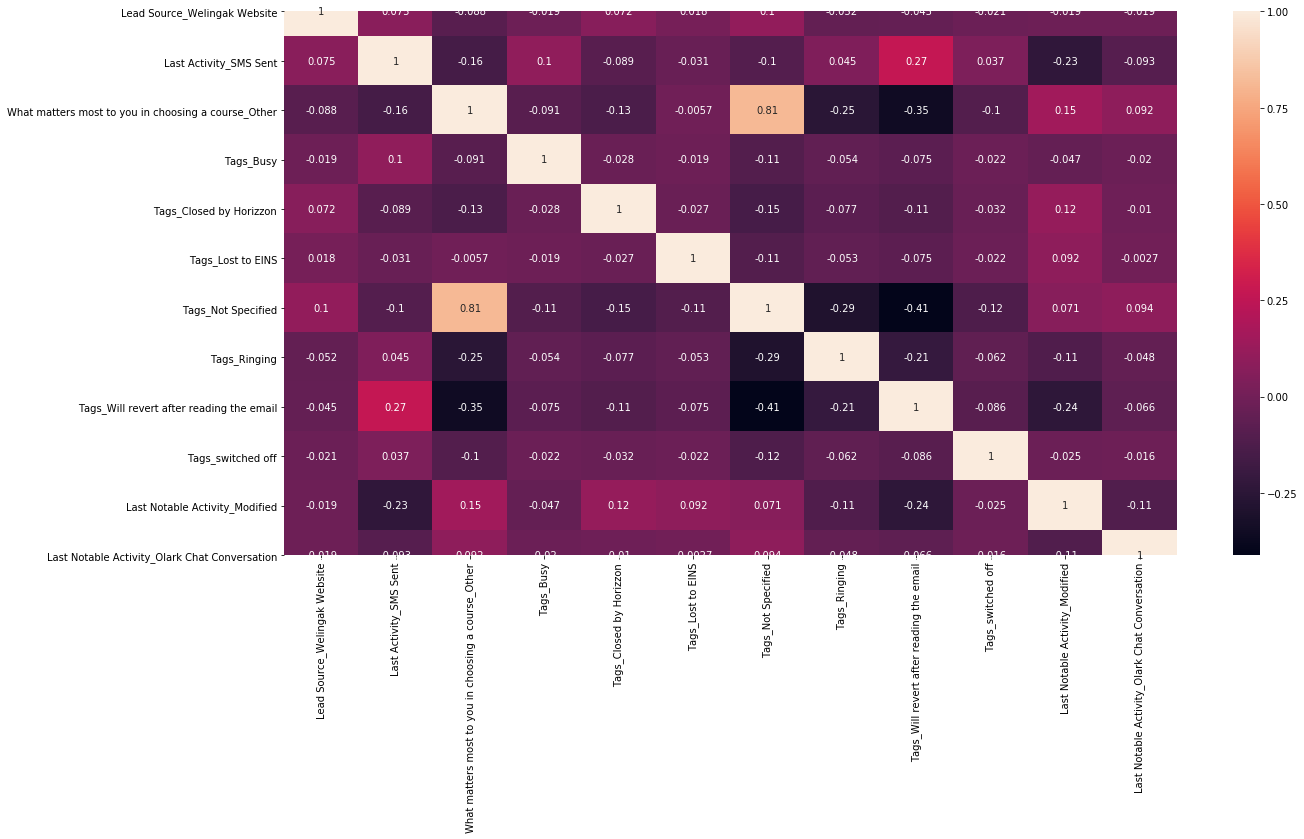

In [778]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

## Model 4

In [779]:
#Tags_not Specified and What matters most to you in choosing a course_Other	 are highle correlated as the correlation is 0.81 
#So dropping the Tags_Not Specified column
col = col.drop('Tags_Not Specified', 1)

In [780]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6063
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1334.7
Date:                Mon, 20 Apr 2020   Deviance:                       2669.4
Time:                        09:23:50   Pearson chi2:                 1.39e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -1.3452      0.090    -14.878      0.000      -1.522      -1.168
Lead Source_Welingak Website                            5.8679      1.033      5.678      0.000       3.842       7.893
Last Activity_SMS Sent                                  2.2380      0.113     19.861      0.000       2.017       2.459
What matters most to you in choosing a course_Other    -0.7261      0.116     -6.249      0.000      -0.954      -0.498
Tags_Busy                                               0.5888      0.243      2.418      0.016       0.112       1.066
Tags_Closed by Horizzon                                 7.5815      0.723     10.482      0.000       6.164       8.999
Tags_Lost to EINS                                       6.6521      0.603     11.036      0.000       5.471       7.833
Tags_Ringing                                           -3.3505      0.239    -14.009      0.000      -3.819      -2.882
Tags_Will revert after reading the email                4.9927      0.192     25.989      0.000       4.616       5.369
Tags_switched off                                      -3.8722      0.600     -6.455      0.000      -5.048      -2.697
Last Notable Activity_Modified                         -2.0132      0.128    -15.681      0.000      -2.265      -1.762
Last Notable Activity_Olark Chat Conversation          -1.6452      0.510     -3.226      0.001      -2.645      -0.646
=======================================================================================================================
"""

So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [781]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [782]:
y_train_pred[:10]

array([0.03362033, 0.03362033, 0.00905153, 0.20664943, 0.98555824,
       0.99722808, 0.01655192, 0.20664943, 0.20664943, 0.00905153])

In [783]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID
0           0             0.03    5182
1           0             0.03    8469
2           0             0.01    8382
3           0             0.21    8031
4           1             0.99    6712

In [784]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted
0           0             0.03    5182          0
1           0             0.03    8469          0
2           0             0.01    8382          0
3           0             0.21    8031          0
4           1             0.99    6712          1

In [785]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3576  180]
 [ 276 2043]]


In [786]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9249382716049382


### Calculating Other Metrics

In [787]:
def CalculateMetrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sesitivity For the Model : ",(TP / float(TP+FN)))
    print("specificity For the Model : ",(TN / float(TN+FP)))
    print("false postive rate For the Model : ",(FP/ float(TN+FP)))
    print("precision/false postive rate For the Model : ",(TP / float(TP+FP)))
    print("Negative predictive value For the Model : ",(TN / float(TN+ FN)))    

In [788]:
CalculateMetrics(confusion)

Sesitivity For the Model :  0.8809831824062095
specificity For the Model :  0.952076677316294
false postive rate For the Model :  0.04792332268370607
precision/false postive rate For the Model :  0.9190283400809717
Negative predictive value For the Model :  0.9283489096573209


### Plotting the ROC Curve

In [789]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [790]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

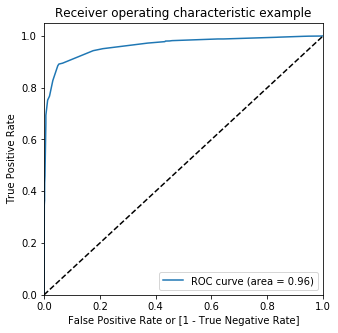

In [791]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Finding Optimal Threshold Value

In [792]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0             0.03    5182          0    1    0    0    0    0   
1           0             0.03    8469          0    1    0    0    0    0   
2           0             0.01    8382          0    1    0    0    0    0   
3           0             0.21    8031          0    1    1    1    0    0   
4           1             0.99    6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    1    1

In [793]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.38         1.00         0.00
0.10         0.10      0.76         0.97         0.63
0.20         0.20      0.87         0.94         0.82
0.30         0.30      0.93         0.89         0.95
0.40         0.40      0.92         0.88         0.95
0.50         0.50      0.92         0.88         0.95
0.60         0.60      0.91         0.83         0.97
0.70         0.70      0.91         0.83         0.97
0.80         0.80      0.90         0.77         0.98
0.90         0.90      0.88         0.69         0.99


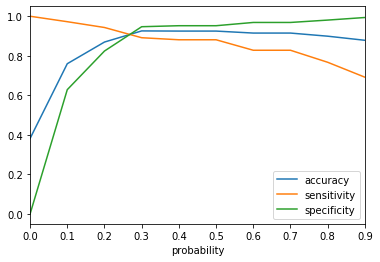

In [794]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability

In [795]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

Conversion  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0             0.03    5182          0    1    0    0    0    0   
1           0             0.03    8469          0    1    0    0    0    0   
2           0             0.01    8382          0    1    0    0    0    0   
3           0             0.21    8031          0    1    1    1    0    0   
4           1             0.99    6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    1    1                1

In [796]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.925761316872428

In [797]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)
confusion2

array([[3557,  199],
       [ 252, 2067]], dtype=int64)

In [798]:
CalculateMetrics(confusion2)

Sesitivity For the Model :  0.8913324708926261
specificity For the Model :  0.9470181043663471
false postive rate For the Model :  0.05298189563365282
precision/false postive rate For the Model :  0.912180052956752
Negative predictive value For the Model :  0.9338409031241796


### Precision and Recall

In [799]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3576,  180],
       [ 276, 2043]], dtype=int64)

Precision

TP / TP + FP

In [800]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9190283400809717

Recall

TP / TP + FN

In [801]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8809831824062095

### Precision and recall tradeoff

In [802]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

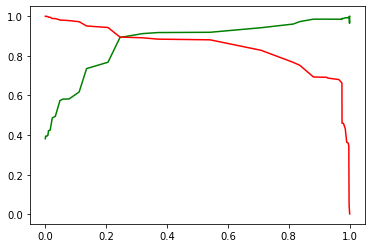

In [803]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [804]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
475         -1.16                        -0.87                 -1.25   
2461        -1.16                        -0.87                 -1.25   
1890        -0.33                        -0.56                 -0.05   
6007         0.08                        -0.70                 -0.35   
4052         0.08                        -0.60                  0.56   

      A free copy of Mastering The Interview  \
475                                        0   
2461                                       0   
1890                                       0   
6007                                       1   
4052                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
475                                     0                          1   
2461                                    0                          1   
1890                                    0                          0   
6007                                    0                          0   
4052                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
475                         0                           0   
2461                        0                           0   
1890                        0                           0   
6007                        0                           0   
4052                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
475                            0                     0  ...   
2461                           0                     0  ...   
1890                           0                     0  ...   
6007                           0                     0  ...   
4052                           1                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
475                                                 0   
2461                                                0   
1890                                                0   
6007                                                0   
4052                                                0   

      Last Notable Activity_Had a Phone Conversation  \
475                                                0   
2461                                               0   
1890                                               0   
6007                                               0   
4052                                               0   

      Last Notable Activity_Modified  \
475                                0   
2461                               0   
1890                               0   
6007                               0   
4052                               0   

      Last Notable Activity_Olark Chat Conversation  \
475                                               0   
2461                                              0   
1890                                              0   
6007                                              0   
4052                                              0   

      Last Notable Activity_Page Visited on Website  \
475                                               0   
2461                                              0   
1890                                              0   
6007                                              0   
4052                                              0   

      Last Notable Activity_Resubscribed to emails  \
475                                              0   
2461                                             0   
1890                                             0   
6007                                             0   
4052                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
475                                0                                  0   
2461                               1           

In [805]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
475                              0                       0   
2461                             1                       1   
1890                             0                       0   
6007                             0                       0   
4052                             0                       1   

      What matters most to you in choosing a course_Other  Tags_Busy  \
475                                                   0            0   
2461                                                  0            0   
1890                                                  1            0   
6007                                                  0            0   
4052                                                  0            0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
475                         0                  1             0   
2461                        0                  0             0   
1890                        0                  0             0   
6007                        0                  0             0   
4052                        0                  0             1   

      Tags_Will revert after reading the email  Tags_switched off  \
475                                          0                  0   
2461                                         0                  0   
1890                                         0                  0   
6007                                         0                  0   
4052                                         0                  0   

      Last Notable Activity_Modified  \
475                                0   
2461                               0   
1890                               0   
6007                               0   
4052                               0   

      Last Notable Activity_Olark Chat Conversation  
475                                               0  
2461                                              0  
1890                                              0  
6007                                              0  
4052                                              0

In [806]:
#Adding constant
X_test_sm = sm.add_constant(X_test)
#Making prediction
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

475    1.00
2461   1.00
1890   0.11
6007   0.21
4052   0.08
7587   0.03
2066   0.03
7285   0.97
3269   0.02
4817   0.03
dtype: float64

In [807]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [808]:
# Let's see the head
y_pred_1.head()

0
475  1.00
2461 1.00
1890 0.11
6007 0.21
4052 0.08

In [809]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [810]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [811]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [812]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [813]:
y_pred_final.head()

Converted  LeadID    0
0          1     475 1.00
1          1    2461 1.00
2          0    1890 0.11
3          0    6007 0.21
4          0    4052 0.08

In [814]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [815]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  LeadID  Conversion_Prob
0          1     475             1.00
1          1    2461             1.00
2          0    1890             0.11
3          0    6007             0.21
4          0    4052             0.08

In [816]:
y_pred_final.shape

(2604, 3)

In [817]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [818]:
y_pred_final.head()

Converted  LeadID  Conversion_Prob  final_predicted
0          1     475             1.00                1
1          1    2461             1.00                1
2          0    1890             0.11                0
3          0    6007             0.21                0
4          0    4052             0.08                0

In [819]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.9101382488479263

In [820]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1490  101]
 [ 133  880]]


In [821]:
CalculateMetrics(confusion_test)

Sesitivity For the Model :  0.8687068114511353
specificity For the Model :  0.9365179132620993
false postive rate For the Model :  0.06348208673790069
precision/false postive rate For the Model :  0.8970438328236493
Negative predictive value For the Model :  0.9180529882932841


In [822]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

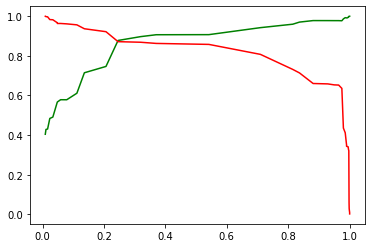

In [823]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Plotting the ROC Curve

In [824]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [825]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

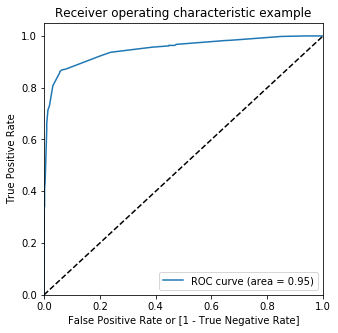

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.28535512e-04,
        6.28535512e-04, 1.25707102e-03, 1.88560654e-03, 1.88560654e-03,
        1.88560654e-03, 1.88560654e-03, 1.88560654e-03, 3.77121307e-03,
        9.42803268e-03, 9.42803268e-03, 9.42803268e-03, 9.42803268e-03,
        9.42803268e-03, 1.38277813e-02, 1.94846009e-02, 3.14267756e-02,
        5.59396606e-02, 5.65681961e-02, 6.34820867e-02, 7.73098680e-02,
        1.99245757e-01, 2.38214959e-01, 3.87177876e-01, 4.46260214e-01,
        4.46888749e-01, 4.68258957e-01, 4.73915776e-01, 6.48648649e-01,
        6.67504714e-01, 8.39094909e-01, 8.47265871e-01, 9.38403520e-01,
        9.39032055e-01, 9.56002514e-01, 9.57888121e-01, 9.93086109e-01,
        1.00000000e+00]),
 array([0.        , 0.00197433, 0.00394867, 0.00493583, 0.005923  ,
        0.00789733, 0.0088845 , 0.00987167

In [826]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [827]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

475    99.51
2461   99.88
1890   11.19
6007   20.66
4052    7.89
7587    3.36
2066    3.36
7285   97.46
3269    1.66
4817    3.36
dtype: float64

## Determining Feature Importance

In [828]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                           5.87
Last Activity_SMS Sent                                 2.24
What matters most to you in choosing a course_Other   -0.73
Tags_Busy                                              0.59
Tags_Closed by Horizzon                                7.58
Tags_Lost to EINS                                      6.65
Tags_Ringing                                          -3.35
Tags_Will revert after reading the email               4.99
Tags_switched off                                     -3.87
Last Notable Activity_Modified                        -2.01
Last Notable Activity_Olark Chat Conversation         -1.65
dtype: float64

In [832]:
new_params.sort_values(ascending=False)

Tags_Closed by Horizzon                                7.58
Tags_Lost to EINS                                      6.65
Lead Source_Welingak Website                           5.87
Tags_Will revert after reading the email               4.99
Last Activity_SMS Sent                                 2.24
Tags_Busy                                              0.59
What matters most to you in choosing a course_Other   -0.73
Last Notable Activity_Olark Chat Conversation         -1.65
Last Notable Activity_Modified                        -2.01
Tags_Ringing                                          -3.35
Tags_switched off                                     -3.87
dtype: float64

## Conclusion

After trying several models, we finally chose a model with the following characteristics:
    
All variables have p-value < 0.05.

All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.

The overall accuracy of 0.91 at a probability threshold of 0.28 on the test dataset is also very acceptable.

Using this model, the dependent variable value was predicted as per the following threshold values of Conversion probability:

Final Observation:

Let us compare the values obtained for Train & Test:

Threshold=0.28

Train Data: 

Accuracy : 92.5%

Sensitivity : 89.1%

Specificity : 94.7%
    
Test Data: 

Accuracy : 91.01%

Sensitivity : 86.8%

Specificity : 93.6%

#### The conversion probability of a lead increases with increase in values of the following features in ascending order:

|Features with Positive Coefficient Values|
|-------------|
Tags_Busy                                              0.59
Last Activity_SMS Sent                                 2.24
Tags_Will revert after reading the email               4.99
Lead Source_Welingak Website                           5.87
Tags_Lost to EINS                                      6.65
Tags_Closed by Horizzon                                7.58

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
Tags_switched off                                     -3.87
Tags_Ringing                                          -3.35
Last Notable Activity_Modified                        -2.01
Last Notable Activity_Olark Chat Conversation         -1.65
What matters most to you in choosing a course_Other   -0.73

## Ashutosh Nayak

## Mahesh Mishra